# Performance measurements of Extra Tree and Stochastic Gradient descent 

In [27]:

import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:

df = p.read_csv("train.csv")

In [30]:
df['places'] = df.AREA.map({'Karapakkam':'Karapakkam', 'Anna Nagar':'Anna_Nagar', 'Adyar':'Adyar', 'Velachery':'Velachery',
'Chrompet':'Chrompet', 'KK Nagar':'KK_Nagar', 'TNagar':'T_Nagar', 'T Nagar':'T_Nagar', 'Chrompt':'Chrompet',
'Chrmpet':'Chrompet', 'Karapakam':'Karapakkam','Ana Nagar':'Anna_Nagar', 'Chormpet':'Chrompet', 'Adyr':'Adyar', 'Velchery':'Velachery','Ann Nagar':'Anna_Nagar',
'KKNagar':'KK_Nagar'})

In [31]:
del df['AREA']

In [32]:
 df['class'] = df.QS_OVERALL.map({4.33 :1, 3.765:1, 3.09 :1, 4.01 :1, 3.29 :1, 3.32 :1, 2.67 :0, 3.26 :1, 3.55 :1,
       3.16 :1, 3.83 :1, 2.89 :0, 2.26 :0, 3.19 :1, 3.66 :1, 3.57 :1, 4.3  :1, 3.35 :1,
       4.76 :1, 3.39 :1, 3.43 :1, 3.73 :1, 3.59 :1, 3.74 :1, 2.29 :0, 3.17 :1, 4.18 :1,
       2.755:0, 2.11 :0, 2.605:0, 4.58 :1, 4.2  :1, 3.27 :1, 4.19 :1, 2.98 :0, 3.12 :1,
       3.08 :1, 3.85 :1, 3.42 :1, 3.2  :1, 4.   :1, 3.34 :1, 2.825:0, 3.46 :1, 4.07 :1,
       3.68 :1, 2.95 :0, 3.505:1, 2.97 :0, 3.63 :1, 3.76 :1, 3.77 :1, 2.78 :0, 3.985:1,
       3.04 :1, 2.88 :0, 4.21 :1, 2.42 :0, 3.8  :1, 2.54 :0, 3.84 :1, 2.395:0, 3.14 :1,
       2.49 :0, 3.175:1, 2.84 :0, 4.17 :1, 3.13 :1, 3.98 :1, 3.36 :1, 3.735:1, 2.62 :0,
       4.61 :1, 2.6  :0, 4.09 :1, 3.18 :1, 3.425:1, 3.71 :1, 3.21 :1, 3.61 :1, 2.9  :0,
       3.94 :1, 4.145:1, 4.26 :1, 4.16 :1, 3.5  :1, 3.22 :1, 3.99 :1, 4.12 :1, 2.475:0,
       2.28 :0, 2.725:0, 4.03 :1, 3.07 :1, 2.81 :0, 3.45 :1, 3.9  :1, 3.87 :1, 3.1  :1,
       2.93 :0, 3.05 :1, 3.54 :1, 2.63 :0, 3.11 :1, 3.89 :1, 3.33 :1, 3.96 :1, 3.56 :1,
       4.39 :1, 3.58 :1, 3.47 :1, 3.88 :1, 4.04 :1, 3.6  :1, 4.53 :1, 3.72 :1, 2.96 :0,
       3.4  :1, 3.51 :1, 4.215:1, 3.055:1, 3.06 :1, 3.53 :1, 3.435:1, 3.41 :1, 3.86 :1,
       3.62 :1, 4.5  :1, 4.42 :1, 4.14 :1, 3.01 :1, 4.24 :1, 2.53 :0, 3.535:1, 2.665:0,
       3.49 :1, 3.52 :1, 3.25 :1, 4.465:1, 4.66 :1, 3.7  :0, 2.495:0, 4.13 :1, 4.37 :1,
       2.66 :0, 2.3  :0, 2.85 :0, 3.31 :1, 3.03 :1, 3.97 :1, 2.75 :0, 3.355:1, 3.75 :1,
       2.775:0, 4.68 :1, 3.15 :1, 3.91 :1, 2.94 :0, 3.24 :1, 4.475:1, 3.67 :1, 3.38 :1,
       4.38 :1, 4.59 :1, 3.295:1, 3.82 :1, 4.64 :1, 4.1  :1, 2.55 :0, 3.37 :1, 3.48 :1,
       2.73 :0, 3.945:1, 3.285:1, 3.93 :1, 4.27 :1, 4.28 :1, 2.34 :0, 3.815:1, 2.79 :0,
       4.035:1, 3.44 :1, 4.325:1, 3.95 :1, 2.785:0, 3.02 :1, 3.64 :1, 4.22 :1, 2.82 :0,
       3.755:1, 3.78 :1, 3.81 :1, 3.92 :1, 4.375:1, 3.3  :1, 3.035:1, 3.575:1, 2.83 :0,
       2.92 :0, 4.08 :1, 4.43 :1, 2.58 :0, 3.28 :1, 3.705:1, 3.935:1, 3.23 :1, 4.06 :1,
       4.46 :1, 4.6  :1, 2.8  :0, 2.61 :0, 2.69 :0, 2.35 :0, 2.87 :0, 3.79 :1, 3.485:1,
       2.91 :0, 2.99 :0, 3.825:1, 4.445:1, 2.985:0, 2.37 :0, 3.745:1, 2.995:0, 3.65 :1,
       2.33 :0, 2.895:0, 3.69 :1, 2.52 :0, 2.51 :0, 4.02 :1, 4.54 :1, 3.255:1, 2.595:0,
       3.615:1, 4.34 :1, 4.05 :1, 4.35 :1, 4.41 :1, 2.71 :0, 3.475:1, 4.015:1, 4.31 :1,
       2.955:0, 2.72 :0, 4.48 :1, 3.605:1, 3.415:1, 4.32 :1, 2.965:0, 3.655:1, 4.7  :1,
       2.57 :0, 4.15 :1, 3.885:1, 2.7  :0, 2.36 :0, 2.68 :0, 2.74 :0, 3.315:1, 4.005:1,
       2.65 :0, 4.71 :1, 4.25 :1, 3.   :1, 3.585:1, 3.075:1, 3.105:1, 2.255:0, 3.185:1,
       4.44 :1, 2.47 :0, 4.47 :1, 3.135:1, 4.9  :1, 4.52 :1, 4.57 :1, 3.595:1, 3.495:1,
       4.56 :1, 2.4  :0, 4.11 :1, 3.165:1, 3.395:1, 4.29 :1, 3.275:1, 2.39 :0, 3.875:1,
       3.555:1, 3.855:1, 2.44 :0, 2.64 :0, 3.095:1, 3.915:1, 2.5  :0, 2.345:0, 2.615:0,
       2.76 :0, 4.125:1, 3.025:1, 3.205:1, 3.465:1, 3.895:1, 2.48 :0, 4.49 :1, 2.77 :0,
       2.24 :0, 2.86 :0, 3.235:1, 2.46 :0, 2.59 :0, 3.445:1, 2.45 :0, 2.25 :0, 4.435:1,
       3.715:1, 2.735:0, 4.4  :1, 4.63 :1, 3.835:1, 3.305:1, 2.375:0, 4.69 :1, 4.155:1,
       3.455:1, 4.23 :1, 2.655:0, 3.685:1, 3.625:1, 4.025:1, 2.885:0, 4.36 :1, 2.945:0,
       2.855:0, 4.115:1, 2.09 :0, 3.795:1, 3.045:1, 3.645:1, 2.975:0, 3.775:1, 2.21 :0,
       4.85 :1, 2.795:0, 4.135:1, 4.78 :1, 2.635:0, 4.095:1, 2.625:0, 3.725:1, 2.835:0,
       4.79 :1, 3.115:1, 4.87 :1, 2.245:0, 4.865:1, 4.495:1, 3.375:1, 2.43 :0, 4.395:1,
       3.545:1, 4.585:1, 4.705:1, 4.83 :1, 4.195:1, 3.365:1, 2.06 :0, 3.995:1, 3.965:1,
       3.635:1, 3.695:1, 4.405:1, 3.785:1, 3.515:1, 3.385:1, 4.515:1, 4.95 :1, 4.255:1,
       4.72 :1, 4.65 :1, 4.045:1, 2.32 :0, 4.73 :1, 4.075:1, 3.145:1, 2.715:0, 3.565:1,
       4.655:1, 2.525:0, 2.565:0, 2.31 :0, 4.165:1, 2.925:0, 2.41 :0, 4.085:1, 3.525:1,
       3.015:1, 2.22 :0, 4.275:1, 3.905:1, 2.515:0, 3.955:1, 3.845:1, 4.345:1, 2.585:0,
       4.75 :1, 3.335:1, 2.18 :0, 2.23 :0, 4.67 :1, 2.455:0, 4.455:1, 2.805:0, 3.345:1,
       4.62 :1, 4.105:1, 3.405:1, 4.615:1, 4.185:1, 2.815:0, 4.45 :1, 4.97 :1, 4.415:1,
       4.055:1, 2.645:0, 2.685:0, 4.315:1, 2.845:0, 4.82 :1, 4.225:1, 3.155:1, 4.205:1,
       4.51 :1, 2.865:0, 2.765:0, 4.605:1, 3.065:1, 2.545:0, 3.265:1, 4.425:1, 2.56 :0,
       2.745:0, 4.065:1, 4.295:1, 2.   :0, 4.55 :1, 3.975:1, 3.675:1, 2.915:0, 2.2  :0,
       3.005:1, 2.385:0, 2.38 :0, 3.665:1, 2.535:0, 3.325:1, 3.925:1, 3.125:1, 4.335:1,
       4.385:1, 2.27 :0, 4.93 :1, 3.805:1, 4.77 :1, 2.195:0, 4.175:1, 2.675:0, 4.695:1,
       2.445:0, 4.265:1, 4.765:1, 2.335:0, 2.465:0, 4.81 :1, 2.905:0, 3.195:1, 3.245:1,
       4.675:1, 4.94 :1})

In [33]:
df.columns

Index(['PRT_ID', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'places', 'class'],
      dtype='object')

In [34]:
df=df.dropna()

In [35]:
df['class'].unique()

array([1., 0.])

In [36]:
df.columns

Index(['PRT_ID', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'places', 'class'],
      dtype='object')

In [37]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['PRT_ID', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'places']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

In [38]:

from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [39]:
X = df.drop(labels='class', axis=1)

y = df.loc[:,'class']    

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Extra Trees Classifier:

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()

et.fit(X_train,y_train)

predictET = et.predict(X_test)


print("")
print('Classification report of Extra Trees Classifier Results:')
print("")

print(classification_report(y_test,predictET))

xet = (accuracy_score(y_test,predictET)*100)

print('Accuracy result of Extra Trees Classifier is:', xet)
print("")
cm1=confusion_matrix(y_test,predictET)
print('Confusion Matrix result of Extra Trees Classifier is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")


Classification report of Extra Trees Classifier Results:

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90       392
         1.0       0.98      0.98      0.98      1725

    accuracy                           0.96      2117
   macro avg       0.94      0.93      0.94      2117
weighted avg       0.96      0.96      0.96      2117

Accuracy result of Extra Trees Classifier is: 96.1738308927728

Confusion Matrix result of Extra Trees Classifier is:
 [[ 349   43]
 [  38 1687]]

Sensitivity :  0.8903061224489796

Specificity :  0.9779710144927536



In [42]:
TN = cm1[0][0]
FN = cm1[1][0]
TP = cm1[1][1]
FP = cm1[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 1687
True Negative : 349
False Positive : 43
False Negative : 38

True Positive Rate : 0.9779710144927536
True Negative Rate : 0.8903061224489796
False Positive Rate : 0.1096938775510204
False Negative Rate : 0.022028985507246378

Positive Predictive Value : 0.9751445086705203
Negative predictive value : 0.9018087855297158


In [43]:
def plot_confusion_matrix(cm1, title='Confusion matrix-ET', cmap=plt.cm.Blues):
    target_names=['Predict','Actual']
    plt.imshow(cm1, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = n.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix-ET:
[[ 349   43]
 [  38 1687]]


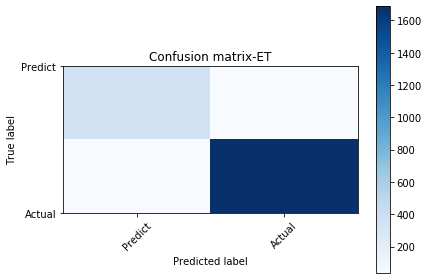

In [44]:
cm1=confusion_matrix(y_test, predictET)
print('Confusion matrix-ET:')
print(cm1)
plot_confusion_matrix(cm1)

In [45]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(y_test, predictET):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictET)
    print ("False Positive rate: ",false_positive_rate)
    print ("True Positive rate: ",true_positive_rate)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic-DT')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

False Positive rate:  [0.         0.10969388 1.        ]
True Positive rate:  [0.         0.97797101 1.        ]


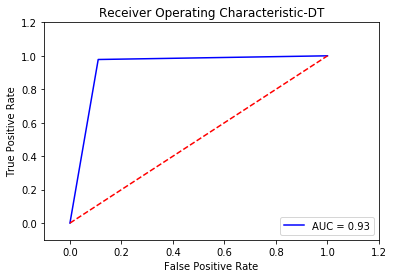

In [46]:
plot_roc_curve(y_test, predictET)

SGD Classifier:

In [47]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train,y_train)
predictsgd = sgd.predict(X_test)


print("")
print('Classification report of SGD Classifier:')
print("")

print(classification_report(y_test,predictsgd))
xsgd = (accuracy_score(y_test,predictsgd)*100)

print('Accuracy result of SGD Classifier is:', xsgd)
print("")
cm2=confusion_matrix(y_test,predictsgd)
print('Confusion Matrix result of SGD Classifier is:\n',cm2)
print("")
sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity1)
print("")



Classification report of SGD Classifier:

              precision    recall  f1-score   support

         0.0       0.90      0.64      0.75       392
         1.0       0.92      0.98      0.95      1725

    accuracy                           0.92      2117
   macro avg       0.91      0.81      0.85      2117
weighted avg       0.92      0.92      0.92      2117

Accuracy result of SGD Classifier is: 92.0642418516769

Confusion Matrix result of SGD Classifier is:
 [[ 252  140]
 [  28 1697]]

Sensitivity :  0.6428571428571429

Specificity :  0.983768115942029



In [48]:
TN = cm2[0][0]
FN = cm2[1][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 1697
True Negative : 252
False Positive : 140
False Negative : 28

True Positive Rate : 0.983768115942029
True Negative Rate : 0.6428571428571429
False Positive Rate : 0.35714285714285715
False Negative Rate : 0.016231884057971015

Positive Predictive Value : 0.9237887860642352
Negative predictive value : 0.9


In [49]:
def plot_confusion_matrix(cm2, title='Confusion matrix-SGD', cmap=plt.cm.Blues):
    target_names=['Predict','Actual']
    plt.imshow(cm2, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = n.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix-SGD:
[[ 252  140]
 [  28 1697]]


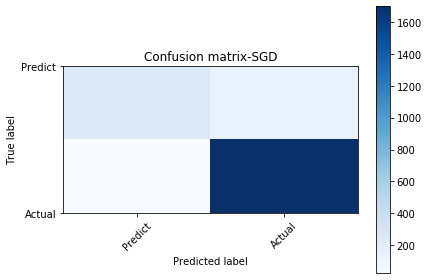

In [50]:
cm2=confusion_matrix(y_test, predictsgd)
print('Confusion matrix-SGD:')
print(cm2)
plot_confusion_matrix(cm2)

In [51]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(y_test, predictsgd):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictsgd)
    print ("False Positive rate: ",false_positive_rate)
    print ("True Positive rate: ",true_positive_rate)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic-SGD')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

False Positive rate:  [0.         0.35714286 1.        ]
True Positive rate:  [0.         0.98376812 1.        ]


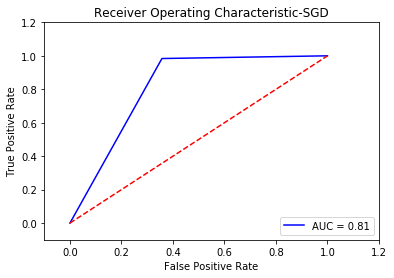

In [52]:
plot_roc_curve(y_test, predictsgd)